# Data manipulation

Plan:
- Add new variables
- Separate based on a character
- Convert variables to numbers
- String manipulation
- Rename variables
- filter observations
- Sorting data

In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_df = pd.read_csv('https://osf.io/yzntm/download')

In [3]:
raw_df.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,0,0% no offer,2017,11,1,0
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,1,1,0
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2017,12,0,1
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,1-15% offer,2017,12,0,1
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,2,1,0


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
raw_df.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,s_city,starrating,rating2_ta,rating2_ta_reviewcount,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,0,0% no offer,2017,11,1,0
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,1,1,0
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2017,12,0,1
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,1-15% offer,2017,12,0,1
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,2,1,0


In [6]:
# goal: find a number of nights per accomodation type 
# create a new variable equal to 1 for each observation
raw_df['nnights'] = 1
raw_df.nnights

0         1
1         1
2         1
3         1
4         1
         ..
149961    1
149962    1
149963    1
149964    1
149965    1
Name: nnights, Length: 149966, dtype: int64

# Repeat

In [7]:
# another way to add number of nights
df = raw_df.assign(nnights = 1)

In [8]:
df.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,s_city,starrating,rating2_ta,rating2_ta_reviewcount,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,nnights
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,0,0% no offer,2017,11,1,0,1
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,1,1,0,1
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2017,12,0,1,1
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,1-15% offer,2017,12,0,1,1
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,2,1,0,1


In [9]:
# We don't need raw_df. we want to delete it
del raw_df

In [10]:
df.groupby('city_actual',axis =0).sum('nnights')

,rating_reviewcount,price,starrating,rating2_ta,rating2_ta_reviewcount,scarce_room,hotel_id,offer,year,month,weekend,holiday,nnights
city_actual,,,,,,,,,,,,,
Abbiategrasso,98.0,132,0.0,7.0,180.0,0,19594.0,0,4034,22,1,0,2
Abtenau,62.0,1986,50.5,43.5,402.0,15,302148.0,0,30268,67,13,2,15
Acharnes,952.0,5097,157.0,211.5,1833.0,29,26817.0,10,125092,411,44,12,62
Adazi,320.0,1107,49.0,43.0,345.0,13,195446.0,10,26229,89,9,2,13
Adnet,184.0,893,24.0,0.0,0.0,8,161168.0,6,16142,43,7,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
lyon,370.0,3370,0.0,45.0,3190.0,10,86150.0,10,20177,61,7,2,10
madrid,1690.0,5969,92.0,114.0,1424.0,26,240928.0,16,52455,198,15,7,26
naples,294.0,1581,0.0,31.5,266.0,10,119670.0,6,20176,69,6,4,10


In [11]:
df.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,s_city,starrating,rating2_ta,rating2_ta_reviewcount,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,nnights
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,0,0% no offer,2017,11,1,0,1
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,1,1,0,1
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2017,12,0,1,1
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,1-15% offer,2017,12,0,1,1
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,2,1,0,1


In [12]:
df['accommodationtype'].head()

0    _ACCOM_TYPE@Hotel
1    _ACCOM_TYPE@Hotel
2    _ACCOM_TYPE@Hotel
3    _ACCOM_TYPE@Hotel
4    _ACCOM_TYPE@Hotel
Name: accommodationtype, dtype: object

In [13]:
df['accommodationtype'].value_counts()

_ACCOM_TYPE@Hotel                  102234
_ACCOM_TYPE@Apartment               17113
_ACCOM_TYPE@Guest House             10080
_ACCOM_TYPE@Bed and breakfast        6395
_ACCOM_TYPE@Hostel                   6232
_ACCOM_TYPE@Apart-hotel              3693
_ACCOM_TYPE@Vacation home Condo      1576
_ACCOM_TYPE@Pension                  1085
_ACCOM_TYPE@Inn                      1020
_ACCOM_TYPE@Country House              89
_ACCOM_TYPE@Palace                     68
_ACCOM_TYPE@                           65
_ACCOM_TYPE@Villa                      64
_ACCOM_TYPE@Resort                     60
_ACCOM_TYPE@Caravan Park               60
_ACCOM_TYPE@House boat                 31
_ACCOM_TYPE@Pousada                    28
_ACCOM_TYPE@Motel                      25
_ACCOM_TYPE@Cabin / Lodge              14
_ACCOM_TYPE@Cottage                    13
_ACCOM_TYPE@Chalet                     11
_ACCOM_TYPE@Castle                      5
_ACCOM_TYPE@All inclusive               5
Name: accommodationtype, dtype: in

In [14]:
# split the column
df['accommodationtype'].str.split('@')

0         [_ACCOM_TYPE, Hotel]
1         [_ACCOM_TYPE, Hotel]
2         [_ACCOM_TYPE, Hotel]
3         [_ACCOM_TYPE, Hotel]
4         [_ACCOM_TYPE, Hotel]
                  ...         
149961    [_ACCOM_TYPE, Hotel]
149962    [_ACCOM_TYPE, Hotel]
149963    [_ACCOM_TYPE, Hotel]
149964    [_ACCOM_TYPE, Hotel]
149965    [_ACCOM_TYPE, Hotel]
Name: accommodationtype, Length: 149966, dtype: object

In [15]:
# grab the second element of each observation
df['accommodationtype'] = df['accommodationtype'].str.split('@').str[1]

In [16]:
df.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,s_city,starrating,rating2_ta,rating2_ta_reviewcount,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,nnights
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3 /5,0,1.0,0,0% no offer,2017,11,1,0,1
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,1,1,0,1
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3 /5,0,1.0,1,15-50% offer,2017,12,0,1,1
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,Amsterdam,4.0,4.0,1115.0,Hotel,4.3 /5,0,1.0,1,1-15% offer,2017,12,0,1,1
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,2,1,0,1


In [17]:
# Finally check nr of nights per acc type
df['accommodationtype'].value_counts()

Hotel                  102234
Apartment               17113
Guest House             10080
Bed and breakfast        6395
Hostel                   6232
Apart-hotel              3693
Vacation home Condo      1576
Pension                  1085
Inn                      1020
Country House              89
Palace                     68
                           65
Villa                      64
Resort                     60
Caravan Park               60
House boat                 31
Pousada                    28
Motel                      25
Cabin / Lodge              14
Cottage                    13
Chalet                     11
Castle                      5
All inclusive               5
Name: accommodationtype, dtype: int64

In [18]:
# Replace the missing category with something meaningful
df['accommodationtype'].replace("","Unknown",inplace = True)

In [19]:
df['accommodationtype'].value_counts()

Hotel                  102234
Apartment               17113
Guest House             10080
Bed and breakfast        6395
Hostel                   6232
Apart-hotel              3693
Vacation home Condo      1576
Pension                  1085
Inn                      1020
Country House              89
Palace                     68
Unknown                    65
Villa                      64
Resort                     60
Caravan Park               60
House boat                 31
Pousada                    28
Motel                      25
Cabin / Lodge              14
Cottage                    13
Chalet                     11
Castle                      5
All inclusive               5
Name: accommodationtype, dtype: int64

In [20]:
# Replace the bed and breakfast category with something meaningful
df['accommodationtype'].replace("Bed and breakfast","BnB",inplace = True)

In [21]:
df['accommodationtype'].value_counts()

Hotel                  102234
Apartment               17113
Guest House             10080
BnB                      6395
Hostel                   6232
Apart-hotel              3693
Vacation home Condo      1576
Pension                  1085
Inn                      1020
Country House              89
Palace                     68
Unknown                    65
Villa                      64
Resort                     60
Caravan Park               60
House boat                 31
Pousada                    28
Motel                      25
Cabin / Lodge              14
Cottage                    13
Chalet                     11
Castle                      5
All inclusive               5
Name: accommodationtype, dtype: int64

### Convert string to numeric columns
- Correct *guestreviewsrating*
- Check w the dtypes property
- Convert to numeric

In [22]:
df.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,s_city,starrating,rating2_ta,rating2_ta_reviewcount,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,nnights
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3 /5,0,1.0,0,0% no offer,2017,11,1,0,1
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,1,1,0,1
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3 /5,0,1.0,1,15-50% offer,2017,12,0,1,1
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,Amsterdam,4.0,4.0,1115.0,Hotel,4.3 /5,0,1.0,1,1-15% offer,2017,12,0,1,1
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,2,1,0,1


In [23]:
df['guestreviewsrating'].value_counts()

4 /5      23160
3.7 /5    15031
4.5 /5    14952
4.3 /5    11268
4.1 /5    11190
3.5 /5    11145
4.4 /5     9079
3.9 /5     8853
3.2 /5     6112
3 /5       4838
4.6 /5     4417
3.4 /5     3727
4.8 /5     3095
5 /5       2646
2.7 /5     2337
2.5 /5     1557
2.9 /5     1213
4.9 /5     1157
2.2 /5      976
2 /5        976
1 /5        679
2.4 /5      472
1.7 /5      143
1.8 /5      112
1.5 /5       91
1.6 /5       54
1.2 /5       48
1.3 /5       41
1.1 /5       10
Name: guestreviewsrating, dtype: int64

In [24]:
#split the column, change the type to float
df['guestreviewsrating'] = df['guestreviewsrating'].str.split(' /').str[0].astype(float)

In [25]:
df#split the column, change the type to float
df['guestreviewsrating'].head()

0    4.3
1    4.3
2    4.3
3    4.3
4    4.3
Name: guestreviewsrating, dtype: float64

In [26]:
df['guestreviewsrating'].dtype

dtype('float64')

<Axes: >

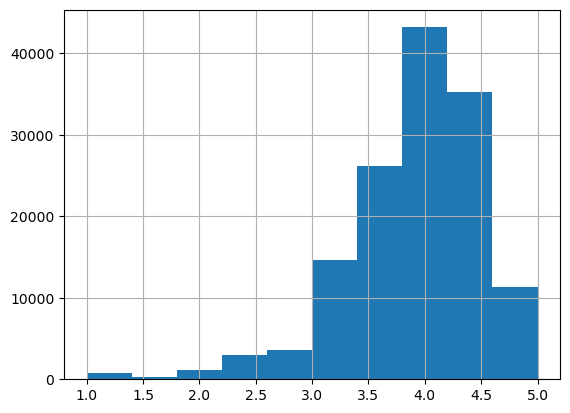

In [27]:
df['guestreviewsrating'].hist()

In [28]:
df['guestreviewsrating'].describe()

count    139379.000000
mean          3.907261
std           0.615691
min           1.000000
25%           3.700000
50%           4.000000
75%           4.400000
max           5.000000
Name: guestreviewsrating, dtype: float64

## Task
Create numeric variables for `center1distance` and `center2distance`.

In [29]:
df.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,s_city,starrating,rating2_ta,rating2_ta_reviewcount,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,nnights
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,0,0% no offer,2017,11,1,0,1
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,1,1,0,1
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2017,12,0,1,1
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,1-15% offer,2017,12,0,1,1
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,2,1,0,1


In [30]:
df['center1distance'].value_counts()

0.7 miles    6837
0.8 miles    6484
0.6 miles    6233
1.0 mile     6191
0.3 miles    5915
             ... 
46 miles       10
50 miles        8
49 miles        6
57 miles        6
42 miles        6
Name: center1distance, Length: 143, dtype: int64

In [31]:
df['center1distance(miles)'] =df['center1distance'].str.split().str[0].str.strip().astype(float)

In [32]:
df['center1distance(miles)'].dtype

dtype('float64')

In [33]:
df['center1distance(miles)'].value_counts()

0.7     6837
0.8     6484
0.6     6233
1.0     6191
0.3     5915
        ... 
46.0      10
50.0       8
49.0       6
57.0       6
42.0       6
Name: center1distance(miles), Length: 143, dtype: int64

In [34]:
df['center2distance'].value_counts()

0.7 miles    3578
0.6 miles    3365
1.0 mile     3209
0.8 miles    3170
0.4 miles    3019
             ... 
44 miles       10
55 miles        6
65 miles        6
61 miles        2
36 miles        1
Name: center2distance, Length: 150, dtype: int64

In [35]:
df['center2distance(miles)'] =df['center2distance'].str.split().str[0].str.strip().astype(float)

In [36]:
df['center2distance(miles)'].dtype

dtype('float64')

In [37]:
df['center2distance(miles)'].value_counts()

0.7     3578
0.6     3365
1.0     3209
0.8     3170
0.4     3019
        ... 
44.0      10
55.0       6
65.0       6
61.0       2
36.0       1
Name: center2distance(miles), Length: 150, dtype: int64

In [38]:
df.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,s_city,starrating,rating2_ta,rating2_ta_reviewcount,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,nnights,center1distance(miles),center2distance(miles)
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,0,0% no offer,2017,11,1,0,1,3.1,3.6
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,1,1,0,1,3.1,3.6
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2017,12,0,1,1,3.1,3.6
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,1-15% offer,2017,12,0,1,1,3.1,3.6
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,2,1,0,1,3.1,3.6


<Axes: >

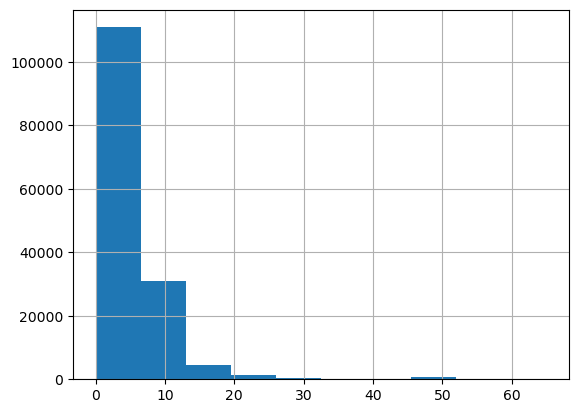

In [39]:
df['center2distance(miles)'].hist(bins = 10)

In [40]:
df.columns

Index(['addresscountryname', 'city_actual', 'rating_reviewcount',
       'center1distance', 'center1label', 'center2distance', 'center2label',
       'neighbourhood', 'price', 'price_night', 's_city', 'starrating',
       'rating2_ta', 'rating2_ta_reviewcount', 'accommodationtype',
       'guestreviewsrating', 'scarce_room', 'hotel_id', 'offer', 'offer_cat',
       'year', 'month', 'weekend', 'holiday', 'nnights',
       'center1distance(miles)', 'center2distance(miles)'],
      dtype='object')

In [41]:
# advanced filtering
df.filter(regex ='rating')

,rating_reviewcount,starrating,rating2_ta,rating2_ta_reviewcount,guestreviewsrating
0,1030.0,4.0,4.0,1115.0,4.3
1,1030.0,4.0,4.0,1115.0,4.3
2,1030.0,4.0,4.0,1115.0,4.3
3,1030.0,4.0,4.0,1115.0,4.3
4,1030.0,4.0,4.0,1115.0,4.3
...,...,...,...,...,...
149961,48.0,4.0,4.5,86.0,4.5
149962,48.0,4.0,4.5,86.0,4.5
149963,48.0,4.0,4.5,86.0,4.5
149964,48.0,4.0,4.5,86.0,4.5


In [42]:
# let's rename a few of them
df.rename(columns = {'rating_reviewcount':'ratings','rating2_ta':'rating'},inplace = True)

In [43]:
df.columns

Index(['addresscountryname', 'city_actual', 'ratings', 'center1distance',
       'center1label', 'center2distance', 'center2label', 'neighbourhood',
       'price', 'price_night', 's_city', 'starrating', 'rating',
       'rating2_ta_reviewcount', 'accommodationtype', 'guestreviewsrating',
       'scarce_room', 'hotel_id', 'offer', 'offer_cat', 'year', 'month',
       'weekend', 'holiday', 'nnights', 'center1distance(miles)',
       'center2distance(miles)'],
      dtype='object')

In [44]:
df.head()

,addresscountryname,city_actual,ratings,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,s_city,starrating,rating,rating2_ta_reviewcount,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,nnights,center1distance(miles),center2distance(miles)
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,0,0% no offer,2017,11,1,0,1,3.1,3.6
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,1,1,0,1,3.1,3.6
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2017,12,0,1,1,3.1,3.6
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,1-15% offer,2017,12,0,1,1,3.1,3.6
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,2,1,0,1,3.1,3.6


In [45]:
df['test1'] = df['center2distance(miles)'].astype(str) +' miles'

In [46]:
df.head()

,addresscountryname,city_actual,ratings,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,s_city,starrating,rating,rating2_ta_reviewcount,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,nnights,center1distance(miles),center2distance(miles),test1
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,0,0% no offer,2017,11,1,0,1,3.1,3.6,3.6 miles
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,1,1,0,1,3.1,3.6,3.6 miles
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2017,12,0,1,1,3.1,3.6,3.6 miles
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,1-15% offer,2017,12,0,1,1,3.1,3.6,3.6 miles
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,2,1,0,1,3.1,3.6,3.6 miles


In [47]:
del df['test1']

In [48]:
df.head()

,addresscountryname,city_actual,ratings,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,s_city,starrating,rating,rating2_ta_reviewcount,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,nnights,center1distance(miles),center2distance(miles)
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,0,0% no offer,2017,11,1,0,1,3.1,3.6
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,1,1,0,1,3.1,3.6
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2017,12,0,1,1,3.1,3.6
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,1-15% offer,2017,12,0,1,1,3.1,3.6
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,2,1,0,1,3.1,3.6


## Task: Renaming
Rename the following:
1. `ratings2_ta_reviewcount` to `ratingta_count`
2. `addresscountryname` to `country`
3. `starrating` to `stars`
4. `s_city` to `city`

In [49]:
df.head()

,addresscountryname,city_actual,ratings,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,s_city,starrating,rating,rating2_ta_reviewcount,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,nnights,center1distance(miles),center2distance(miles)
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,0,0% no offer,2017,11,1,0,1,3.1,3.6
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,1,1,0,1,3.1,3.6
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2017,12,0,1,1,3.1,3.6
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,1-15% offer,2017,12,0,1,1,3.1,3.6
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,2,1,0,1,3.1,3.6


In [50]:
# renaming the columns
df.rename(columns = {'rating2_ta_reviewcount':'ratingta_count','addresscountryname':'country','starrating':'stars','s_city':'city'},inplace = True)

In [51]:
df.head()

,country,city_actual,ratings,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,city,stars,rating,ratingta_count,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,nnights,center1distance(miles),center2distance(miles)
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,0,0% no offer,2017,11,1,0,1,3.1,3.6
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,1,1,0,1,3.1,3.6
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2017,12,0,1,1,3.1,3.6
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,1-15% offer,2017,12,0,1,1,3.1,3.6
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,2,1,0,1,3.1,3.6


In [52]:
df.columns

Index(['country', 'city_actual', 'ratings', 'center1distance', 'center1label',
       'center2distance', 'center2label', 'neighbourhood', 'price',
       'price_night', 'city', 'stars', 'rating', 'ratingta_count',
       'accommodationtype', 'guestreviewsrating', 'scarce_room', 'hotel_id',
       'offer', 'offer_cat', 'year', 'month', 'weekend', 'holiday', 'nnights',
       'center1distance(miles)', 'center2distance(miles)'],
      dtype='object')

In [53]:
df['accommodationtype'].value_counts()

Hotel                  102234
Apartment               17113
Guest House             10080
BnB                      6395
Hostel                   6232
Apart-hotel              3693
Vacation home Condo      1576
Pension                  1085
Inn                      1020
Country House              89
Palace                     68
Unknown                    65
Villa                      64
Resort                     60
Caravan Park               60
House boat                 31
Pousada                    28
Motel                      25
Cabin / Lodge              14
Cottage                    13
Chalet                     11
Castle                      5
All inclusive               5
Name: accommodationtype, dtype: int64

In [54]:
df[df['accommodationtype']=='Hotel']

,country,city_actual,ratings,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,city,stars,rating,ratingta_count,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,nnights,center1distance(miles),center2distance(miles)
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,0,0% no offer,2017,11,1,0,1,3.1,3.6
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,1,1,0,1,3.1,3.6
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2017,12,0,1,1,3.1,3.6
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,1-15% offer,2017,12,0,1,1,3.1,3.6
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,2,1,0,1,3.1,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149961,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,119,price for 1 night,Zagreb,4.0,4.5,86.0,Hotel,4.5,1,22902.0,1,15-50% offer,2017,11,0,0,1,1.1,0.6
149962,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,109,price for 1 night,Zagreb,4.0,4.5,86.0,Hotel,4.5,1,22902.0,1,15-50% offer,2018,4,1,0,1,1.1,0.6
149963,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,109,price for 1 night,Zagreb,4.0,4.5,86.0,Hotel,4.5,1,22902.0,1,15-50% offer,2018,3,1,0,1,1.1,0.6
149964,Croatia,Zagreb,48.0,1.1 miles,City centre,0.6 miles,Zagreb City Museum,Zagreb,446,price for 4 nights,Zagreb,4.0,4.5,86.0,Hotel,4.5,1,22902.0,1,15-50% offer,2017,12,0,1,1,1.1,0.6


In [55]:
# check the missing values
df.isna().sum()

country                       0
city_actual                   0
ratings                   10587
center1distance               0
center1label                  0
center2distance             114
center2label                114
neighbourhood                 0
price                         0
price_night                   0
city                          0
stars                         0
rating                    13037
ratingta_count            13037
accommodationtype             0
guestreviewsrating        10587
scarce_room                   0
hotel_id                    114
offer                         0
offer_cat                     0
year                          0
month                         0
weekend                       0
holiday                       0
nnights                       0
center1distance(miles)        0
center2distance(miles)      114
dtype: int64

In [56]:
df['ratings'].isnull().sum()

10587

In [57]:
# checck out data for which ratings are missings
df[df['ratings'].isna()]

,country,city_actual,ratings,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,city,stars,rating,ratingta_count,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,nnights,center1distance(miles),center2distance(miles)
414,Netherlands,Amsterdam,NaN,2.4 miles,City centre,3.0 miles,Montelbaanstoren,Amsterdam West,175,price for 1 night,Amsterdam,4.0,3.5,3.0,Hotel,NaN,0,68.0,1,15-50% offer,2018,6,1,0,1,2.4,3.0
415,Netherlands,Amsterdam,NaN,2.4 miles,City centre,3.0 miles,Montelbaanstoren,Amsterdam West,221,price for 1 night,Amsterdam,4.0,3.5,3.0,Hotel,NaN,0,68.0,1,15-50% offer,2018,2,1,0,1,2.4,3.0
416,Netherlands,Amsterdam,NaN,2.4 miles,City centre,3.0 miles,Montelbaanstoren,Amsterdam West,249,price for 1 night,Amsterdam,4.0,3.5,3.0,Hotel,NaN,0,68.0,1,15-50% offer,2018,4,1,0,1,2.4,3.0
542,Netherlands,Amsterdam,NaN,4.7 miles,City centre,5.1 miles,Montelbaanstoren,Amsterdam West,1496,price for 4 nights,Amsterdam,3.5,NaN,NaN,Apartment,NaN,1,92.0,0,0% no offer,2017,12,0,1,1,4.7,5.1
1059,Netherlands,Amsterdam,NaN,0.7 miles,City centre,0.2 miles,Montelbaanstoren,Dam Square - Central Station,232,price for 1 night,Amsterdam,4.0,NaN,NaN,Hotel,NaN,0,213.0,0,0% no offer,2018,6,1,0,1,0.7,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149947,Croatia,Zagreb,NaN,4.0 miles,City centre,4.0 miles,Zagreb City Museum,Zagreb,77,price for 1 night,Zagreb,3.0,NaN,NaN,Apartment,NaN,1,22899.0,0,0% no offer,2018,5,1,0,1,4.0,4.0
149948,Croatia,Zagreb,NaN,4.0 miles,City centre,4.0 miles,Zagreb City Museum,Zagreb,311,price for 4 nights,Zagreb,3.0,NaN,NaN,Apartment,NaN,1,22899.0,0,0% no offer,2017,12,0,1,1,4.0,4.0
149949,Croatia,Zagreb,NaN,4.0 miles,City centre,4.0 miles,Zagreb City Museum,Zagreb,77,price for 1 night,Zagreb,3.0,NaN,NaN,Apartment,NaN,1,22899.0,0,0% no offer,2017,12,0,1,1,4.0,4.0
149950,Croatia,Zagreb,NaN,4.0 miles,City centre,4.0 miles,Zagreb City Museum,Zagreb,77,price for 1 night,Zagreb,3.0,NaN,NaN,Apartment,NaN,1,22899.0,0,0% no offer,2017,11,0,0,1,4.0,4.0


In [58]:
# group by country
df['ratings'].isna().groupby(df.country).sum()

country
Austria            449
Belarus             65
Belgium             75
Bulgaria            80
Cameroon             0
Croatia             66
Cyprus               0
Czech Republic     158
Denmark             15
Egypt                1
Estonia              8
Finland             43
France             322
Germany            114
Greece             155
Hungary             82
Ireland             85
Italy             3046
Latvia              60
Lithuania           57
Malta               99
Netherlands         48
Poland             914
Portugal           182
Romania             83
Russia            2112
Serbia              51
Slovakia            71
Spain              358
Sweden              41
Turkey            1023
Ukraine            156
United Kingdom     568
Name: ratings, dtype: int64

In [59]:
# drop missing values
# two ways
# 1. ~ or notnull
df1 = df[~df['ratings'].isna()]

In [60]:
#2 
df = df.dropna(subset = ['ratings'])

In [61]:
# Did it work?

print(f'Now there are {df.ratings.isna().sum()} observations missing.')

Now there are 0 observations missing.


## Wrongly documented observations
For the `stars` column, there are values from 0-5, but the minimum should be 1 and not 0!

In [62]:
df['stars'].value_counts()

3.0    41692
4.0    38583
0.0    22451
2.0    13360
5.0     8346
3.5     7797
2.5     2940
1.0     2383
4.5     1661
1.5      166
Name: stars, dtype: int64

In [63]:
# replace 0.0s with 1.0s using np.where(condition, if true, if false)
df['stars']=np.where(df.stars ==0.0, 1.0,df['stars'])

In [64]:
df['stars'].value_counts()

3.0    41692
4.0    38583
1.0    24834
2.0    13360
5.0     8346
3.5     7797
2.5     2940
4.5     1661
1.5      166
Name: stars, dtype: int64

In [65]:
# checkduplicates
print(f' We have {df.duplicated().sum()} duplicates')

 We have 1761 duplicates


In [66]:
df.shape

(139379, 27)

In [67]:
# we don't need to keep the duplicates
df.drop_duplicates(inplace = True)

In [68]:
df.shape

(137618, 27)

In [69]:
# now we have
print(f'Now we have {df.shape[0]} duplicates')

Now we have 137618 duplicates


## Task 2
We want to get
1. Hotels from Vienna
2. only in 2017, november
3. drop observations with price > 1000 EUR
4. hotels with 3 or more stars
Put all the values in df_vienna

In [70]:
df.head()

,country,city_actual,ratings,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,city,stars,rating,ratingta_count,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,nnights,center1distance(miles),center2distance(miles)
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,0,0% no offer,2017,11,1,0,1,3.1,3.6
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,1,1,0,1,3.1,3.6
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2017,12,0,1,1,3.1,3.6
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,1-15% offer,2017,12,0,1,1,3.1,3.6
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,2,1,0,1,3.1,3.6


In [71]:
# city filter
df_vienna = df[df['city_actual'] == 'Vienna']

In [72]:
df_vienna.shape

(3287, 27)

In [73]:
# date filter
df_vienna = df_vienna[(df_vienna['year'] == 2017) & (df_vienna['month']== 11)]

In [74]:
# stars and price filter
df_vienna = df_vienna[(df_vienna['stars']>=3) & (df_vienna['stars']<=1000)]

In [75]:
df_vienna.shape

(554, 27)

In [79]:
(df['city']==df['city_actual']).sum()

118380

In [84]:
df[['city','city_actual']][df['city']!=df['city_actual']]

,city,city_actual
561,Amsterdam,Badhoevedorp
562,Amsterdam,Badhoevedorp
563,Amsterdam,Badhoevedorp
564,Amsterdam,Badhoevedorp
565,Amsterdam,Badhoevedorp
...,...,...
148958,Warsaw,Raszyn
148959,Warsaw,Raszyn
148960,Warsaw,Raszyn
148961,Warsaw,Raszyn
